In [148]:
import pandas as pd
import numpy as np
import yfinance as yf

In [2]:
'''
Ideas

Fama-French

- MKT: Excess return from market



Market: F1 = rm-rf

Rm-Rf, the excess return on the market, value-weight return of all CRSP firms incorporated in the US 
and listed on the NYSE, AMEX, or NASDAQ that have a CRSP share code of 10 or 11 at the beginning of 
month t, good shares and price data at the beginning of t, and good return data for t minus the one-month 
Treasury bill rate (from Ibbotson Associates).


- SMB: Small minus big. excess return of small market cap stocks over larger market cap stock...small stocks expected to have higher return than big stocks

Size: F2 = r_small - r_big

SMB = 1/3 (Small Value + Small Neutral + Small Growth) - 1/3 (Big Value + Big Neutral + Big Growth).

Sort by size and then value??? what is neutral

- HML: High minus low. Excess return of value stocks over growth stocks...Economic insight: growth stocks have lower book to price ratio than value

Book/Market Equity: F3 = r_value - r_growth

HML = 1/2 (Small Value + Big Value) - 1/2 (Small Growth + Big Growth).	

Sort by value and then size??? 



Extra factors:

Fara-Macbeth 5 factor model:
- RMW: Robust minus weak. Excess return of firms with higher operating profits over those with lower profits 

OP = (Rev - COGS - Operating Expense - Depreciation - Amortization)
- CMA: Conservative minus aggressive: Excess return of firms that invest less rather than more 

Investment behavior = (total assets year t-1/total assets year t-2)

Our addition:
- Momentum: Excess return of firms with higher momentum rather than lower (market or stocks)
- Volatility: Excess return of firms with more volatility rather than less (market or stocks RMS rapid-stable)
- Credit Rating: Excess return of firms with more credit rating rather than less





resources:
https://www.bauer.uh.edu/rsusmel/phd/Fama-French_JFE93.pdf
https://www.bauer.uh.edu/rsusmel/phd/jegadeesh-titman93.pdf

https://medium.com/the-handbook-of-coding-in-finance/estimating-stock-returns-with-fama-french-three-factor-model-in-python-1a98e3936859
https://www.quantconnect.com/tutorials/introduction-to-financial-python/fama-french-multi-factor-models


http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/fama-french/fama-french-five-factors/
https://wrds-www.wharton.upenn.edu/pages/support/research-wrds/research-guides/fama-french-research-portfolios-and-factors/


Data sources:
https://wrds-www.wharton.upenn.edu/pages/get-data/center-research-security-prices-crsp/quarterly-update/tools/mutual-funds-returns-and-fama-french/




questions:

    what secuirites should we look at...mutual funds/etf/stocks
    How far should our data go?
    How to find growth vs value stocks/funds (look at book to price or book to market)
    Where to get operating profit info/total assets (found in wrds)

    Should we reconstruct our factors from scratch for market return, smb, hml, rmw, cma

    Is momentum from the market or fund themselves (same for vol...)

    How to solve for SmB and HmL using info from french website...wouldn't we just sort by the market cap and the book/market ratio???

    Can we simplify rm-rf to be sp500 return - risk free rate instead of the the weighted average of all stocks in the market


    Significance of factors

    Is there a way we can CSRP codes to find these stocks

    What are the cut offs for rmw, cma, momentum, and there other factor we come up with?

    How should we construct a portfilo of stocks....what is the metric to use...r2? long the best and short the worst



'''

'\nIdeas\n\nFama-French\n\n- MKT: Excess return from market\n\n\nMarket: F1 = rm-rf\n\n- SMB: Small minus big. excess return of small market cap stocks over larger market cap stock...small stocks expected to have higher return than big stocks\n\nSize: F2 = r_small - r_big\n\n\n- HML: High minus low. Excess return of value stocks over growth stocks...Economic insight: growth stocks have lower book to price ratio than value\n\nBook/Market Equity: F3 = r_value - r_growth\n\n\n\n\nExtra factors:\n\nFara-Macbeth 5 factor model:\n- RMW: Robust minus weak. Excess return of firms with higher operating profits over those with lower profits \n\nOP = (Rev - COGS - Operating Expense - Depreciation - Amortization)\n- CMA: Conservative minus aggressive: Excess return of firms that invest less rather than more \n\nInvestment behavior = (total assets year t-1/total assets year t-2)\n\nOur addition:\n- Momentum: Excess return of firms with higher momentum rather than lower\n- Volatility: Excess return 

In [309]:
ff = pd.read_csv("ff_all.csv")

In [310]:
ff.head()

,date,mktrf,smb,hml,rmw,cma,rf,umd
0,19630701,-0.0067,0.0002,-0.0035,0.0003,0.0013,0.00012,-0.0021
1,19630702,0.0079,-0.0028,0.0028,-0.0008,-0.0021,0.00012,0.0042
2,19630703,0.0063,-0.0018,-0.0010,0.0013,-0.0025,0.00012,0.0041
3,19630705,0.0040,0.0009,-0.0028,0.0007,-0.0030,0.00012,0.0007
4,19630708,-0.0063,0.0007,-0.0020,-0.0027,0.0006,0.00012,-0.0045


In [311]:
ff["date"] = pd.to_datetime(ff["date"].apply(str))

In [312]:
type(ff["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [313]:
def get_data(symbol, interval = "1d", start_date = "2012-01-01", end_date = "2021-12-31"):
   
    '''
    Returns asset information

            Parameters:
                    symbol (string): ticker symbol for lookup
                    interval (string): periods between datapoints (valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo)
                    start_date (string): format YYYY-MM-DD
                    end_date (string): format YYYY-MM-DD
            Returns:
                    (DateFrame): Asset Information  
    '''

    return yf.download(symbol, start=start_date, end=end_date, interval=interval)

In [314]:
stocks = pd.read_csv("Daily_stock_data.csv")

In [315]:
stocks.head()

,gvkey,iid,datadate,tic,conm,cshoc,prccd,exchg
0,1300,1,20120103,HON,HONEYWELL INTERNATIONAL INC,773497000.0,55.58,14
1,1300,1,20120104,HON,HONEYWELL INTERNATIONAL INC,773497000.0,55.53,14
2,1300,1,20120105,HON,HONEYWELL INTERNATIONAL INC,773497000.0,55.59,14
3,1300,1,20120106,HON,HONEYWELL INTERNATIONAL INC,773497000.0,55.18,14
4,1300,1,20120109,HON,HONEYWELL INTERNATIONAL INC,773497000.0,55.64,14


In [316]:
stocks.dtypes

gvkey         int64
iid           int64
datadate      int64
tic          object
conm         object
cshoc       float64
prccd       float64
exchg         int64
dtype: object

In [317]:
stocks = stocks.rename({'datadate':'date'}, axis=1)

In [318]:
stocks["date"] = pd.to_datetime(stocks["date"].apply(str))

In [319]:
import matplotlib.pyplot as plt

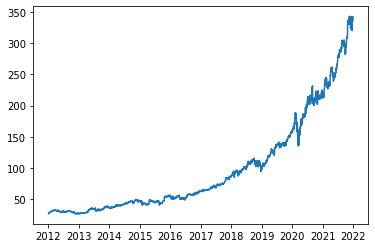

In [320]:
example = stocks[stocks["tic"] == "MSFT"]
plt.plot(example["date"], example["prccd"])

In [321]:

close_prices = example.set_index("date")[["prccd"]]

In [322]:
close_prices

,prccd
date,
2012-01-03,26.765
2012-01-04,27.400
2012-01-05,27.680
2012-01-06,28.105
2012-01-09,27.740
...,...
2021-12-27,342.450
2021-12-28,341.250
2021-12-29,341.950


In [384]:
example = get_data("AXVNX")

[*********************100%***********************]  1 of 1 completed


In [385]:
example

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-08 00:00:00-05:00,10.680000,10.680000,10.680000,10.680000,10.264190,0
2019-01-09 00:00:00-05:00,10.800000,10.800000,10.800000,10.800000,10.379519,0
2019-01-10 00:00:00-05:00,10.850000,10.850000,10.850000,10.850000,10.427572,0
2019-01-11 00:00:00-05:00,10.900000,10.900000,10.900000,10.900000,10.475625,0
2019-01-14 00:00:00-05:00,10.860000,10.860000,10.860000,10.860000,10.437182,0
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,16.690001,16.690001,16.690001,16.690001,16.690001,0
2021-12-27 00:00:00-05:00,16.920000,16.920000,16.920000,16.920000,16.920000,0
2021-12-28 00:00:00-05:00,16.910000,16.910000,16.910000,16.910000,16.910000,0


In [386]:
example.index = pd.to_datetime(example.index)

In [387]:
close_prices = example[["Close"]]

In [388]:
close_prices["return"] = close_prices['Close'].pct_change()

/var/folders/m6/h9jtrhyn259fytxp6j9xh9v00000gn/T/ipykernel_4880/1967168382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices["return"] = close_prices['Close'].pct_change()


In [389]:
close_prices["return"] = close_prices['prccd'].pct_change()

KeyError: 'prccd'

In [390]:
close_prices = close_prices[1:]

In [391]:
close_prices

,Close,return
Date,,
2019-01-09 00:00:00-05:00,10.800000,0.011236
2019-01-10 00:00:00-05:00,10.850000,0.004630
2019-01-11 00:00:00-05:00,10.900000,0.004608
2019-01-14 00:00:00-05:00,10.860000,-0.003670
2019-01-15 00:00:00-05:00,10.890000,0.002762
...,...,...
2021-12-23 00:00:00-05:00,16.690001,0.006028
2021-12-27 00:00:00-05:00,16.920000,0.013781
2021-12-28 00:00:00-05:00,16.910000,-0.000591


In [392]:
close_prices.index.names = ['date']


In [393]:
close_prices

,Close,return
date,,
2019-01-09 00:00:00-05:00,10.800000,0.011236
2019-01-10 00:00:00-05:00,10.850000,0.004630
2019-01-11 00:00:00-05:00,10.900000,0.004608
2019-01-14 00:00:00-05:00,10.860000,-0.003670
2019-01-15 00:00:00-05:00,10.890000,0.002762
...,...,...
2021-12-23 00:00:00-05:00,16.690001,0.006028
2021-12-27 00:00:00-05:00,16.920000,0.013781
2021-12-28 00:00:00-05:00,16.910000,-0.000591


In [394]:
ff = ff.set_index("date")

KeyError: "None of ['date'] are in the columns"

In [395]:
type(close_prices.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [396]:
type(ff.index[0])

datetime.date

In [397]:
close_prices.index = close_prices.index.date

In [398]:
ff.index = ff.index.date

AttributeError: 'Index' object has no attribute 'date'

In [399]:
ff_example = pd.merge(ff, close_prices[["return"]],left_index=True, right_index=True)

In [400]:
ff_example

,mktrf,smb,hml,rmw,cma,rf,umd,return
2019-01-09,0.0056,0.0050,0.0010,0.0008,-0.0019,0.0001,-0.0081,0.011236
2019-01-10,0.0042,0.0000,-0.0046,-0.0006,-0.0004,0.0001,-0.0038,0.004630
2019-01-11,-0.0001,0.0020,0.0022,0.0023,0.0025,0.0001,-0.0021,0.004608
2019-01-14,-0.0060,-0.0045,0.0094,0.0024,0.0000,0.0001,-0.0060,-0.003670
2019-01-15,0.0106,-0.0014,-0.0088,-0.0030,-0.0057,0.0001,0.0115,0.002762
...,...,...,...,...,...,...,...,...
2021-12-23,0.0071,0.0029,-0.0048,-0.0037,-0.0039,0.0000,0.0009,0.006028
2021-12-27,0.0122,-0.0013,0.0030,0.0097,0.0048,0.0000,0.0193,0.013781
2021-12-28,-0.0027,-0.0041,0.0081,0.0085,0.0021,0.0000,-0.0053,-0.000591
2021-12-29,0.0006,-0.0002,0.0017,0.0069,0.0002,0.0000,0.0042,0.003548


In [401]:
ff_example["sec-rf"] = ff_example['return'] - ff_example["rf"]

In [402]:
y = ff_example["sec-rf"]
X = ff_example[["mktrf", "smb", "hml", "rmw", "cma", "umd"]]

In [403]:
import statsmodels.api as sm

In [404]:
X_sm = sm.add_constant(X)

In [405]:
model = sm.OLS(y,X_sm)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sec-rf   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     6074.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:23:04   Log-Likelihood:                 3315.4
No. Observations:                 751   AIC:                            -6617.
Df Residuals:                     744   BIC:                            -6584.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.886e-05      0.000     -0.267      0.789      -0.000       0.000
mktrf          0.9948      0.008    124.065      0.000       0.979       1.011
smb            0.8560      0.016     52.803      0.000       0.824       0.888
hml            0.5781      0.017     34.777      0.000       0.545       0.611
rmw            0.1655      0.024      6.877      0.000       0.118       0.213
cma           -0.1857      0.032     -5.851      0.000      -0.248      -0.123
umd            0.0224      0.011      2.080      0.038       0.001       0.044
==============================================================================
Omnibus:                      164.003   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3242.772
Skew:                          -0.408   Prob(JB):                         0.00
Kurtosis:                      13.147   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# mktrf = beta
# smb = ~0: large cap, 0.5< : small cap
# hml: A zero value defines a growth portfolio, a value of more than 0.3, a value fund.) 
# rmw
